<a href="https://colab.research.google.com/github/Y-Xiang/DeepLearning/blob/main/Assignment1_D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
fmnist_data = tf.keras.datasets.fashion_mnist.load_data()
cifar_data = tf.keras.datasets.cifar10.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


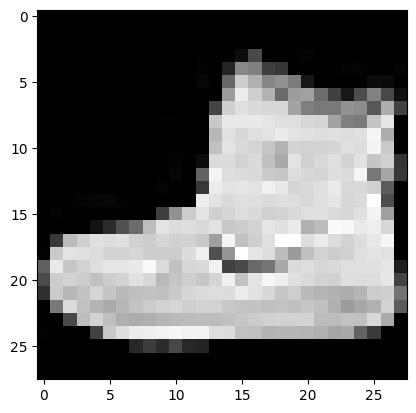

In [ ]:
(fm_train_x, fm_train_y), (fm_test_x, fm_test_y) = fmnist_data
np.shape(fm_train_x)
first_image = fm_train_x[:1]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

Label	Description<br>
0	T-shirt/top<br>
1	Trouser<br>
2	Pullover<br>
3	Dress<br>
4	Coat<br>
5	Sandal<br>
6	Shirt<br>
7	Sneaker<br>
8	Bag<br>
9	Ankle boot<br>

In [ ]:
model_mlp = tf.keras.models.Sequential([
  tf.keras.Input(shape = (28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
print(model_mlp)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model_mlp.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
his_mlp = model_mlp.fit(fm_train_x, fm_train_y, epochs = 50)


Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.8438 - accuracy: 0.5092
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0776 - accuracy: 0.6123
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8664 - accuracy: 0.6602
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8151 - accuracy: 0.6794
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7654 - accuracy: 0.6942
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7435 - accuracy: 0.7032
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7449 - accuracy: 0.7028
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7167 - accuracy: 0.7114
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7144 - accuracy: 0.7099
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.710

dict_keys(['loss', 'accuracy'])


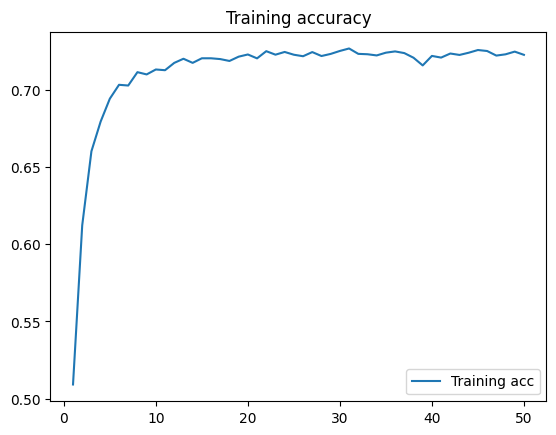

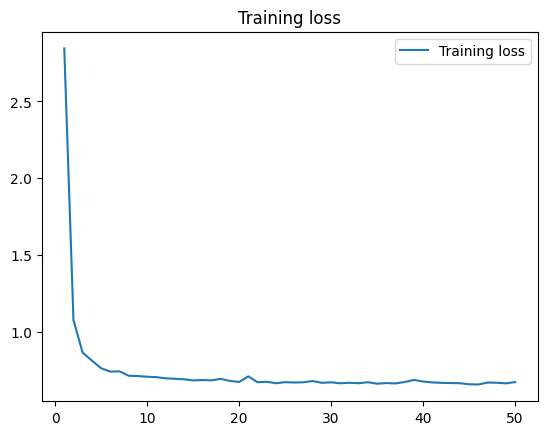

In [ ]:
print(his_mlp.history.keys())
acc = his_mlp.history['accuracy']
# val_acc = history.history['val_acc']
loss = his_mlp.history['loss']
# val_loss = history.history['val_loss']
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
model_mlp.evaluate(fm_test_x, fm_test_y, verbose=2)

313/313 - 1s - loss: 0.6201 - accuracy: 0.7437 - 606ms/epoch - 2ms/step


[0.620140552520752, 0.7437000274658203]

In [ ]:
model_cnn = tf.keras.models.Sequential([
  tf.keras.Input(shape = (28,28,1)),
  tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10)
])
print(model_cnn)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model_cnn.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
his_cnn = model_cnn.fit(fm_train_x, fm_train_y, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.6344 - accuracy: 0.7955
Epoch 2/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4143 - accuracy: 0.8468
Epoch 3/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3633 - accuracy: 0.8659
Epoch 4/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3331 - accuracy: 0.8770
Epoch 5/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3123 - accuracy: 0.8836
Epoch 6/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2997 - accuracy: 0.8890
Epoch 7/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2857 - accuracy: 0.8944
Epoch 8/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2737 - accuracy: 0.8987
Epoch 9/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2598 - accuracy: 0.9047
Epoch 10/20
1875/1875 [==============================] - 45s 24m

dict_keys(['loss', 'accuracy'])


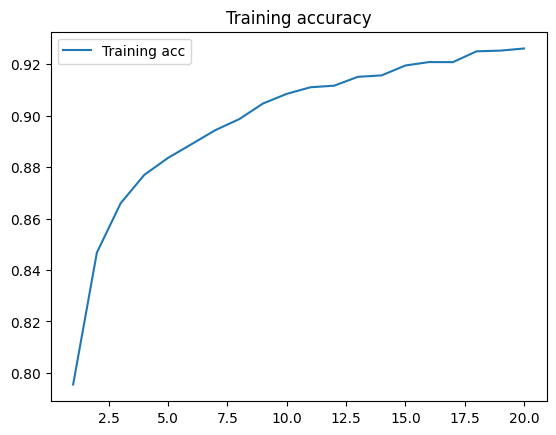

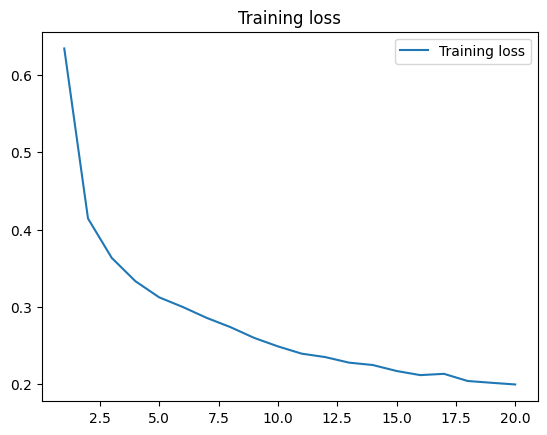

In [ ]:
print(his_cnn.history.keys())
acc = his_cnn.history['accuracy']
# val_acc = history.history['val_acc']
loss = his_cnn.history['loss']
# val_loss = history.history['val_loss']
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
model_cnn.evaluate(fm_test_x, fm_test_y, verbose=2)

313/313 - 2s - loss: 0.3019 - accuracy: 0.9122 - 2s/epoch - 6ms/step


[0.3019128739833832, 0.9121999740600586]

In [ ]:
(cf_train_x, cf_train_y), (cf_test_x, cf_test_y) = cifar_data
np.shape(cf_train_x[:1])



(1, 32, 32, 3)

In [ ]:
model_mlp = tf.keras.models.Sequential([
  tf.keras.Input(shape = (32,32,3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
print(model_mlp)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model_mlp.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
his_mlp = model_mlp.fit(cf_train_x, cf_train_y, epochs = 20,
                        validation_split=0.2, batch_size = 100)

<Sequential name=sequential_4, built=True>
Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1813 - loss: 2.1804 - val_accuracy: 0.2981 - val_loss: 1.9095
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2801 - loss: 1.9376 - val_accuracy: 0.3439 - val_loss: 1.8323
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3012 - loss: 1.8945 - val_accuracy: 0.3680 - val_loss: 1.7778
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3234 - loss: 1.8547 - val_accuracy: 0.3614 - val_loss: 1.7791
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3334 - loss: 1.8295 - val_accuracy: 0.3731 - val_loss: 1.7370
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3490 - loss: 1.7861 - val_accuracy: 0.3941 - val_loss: 1.7101
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3569 - loss: 1.7646 - val_accuracy: 0.3942 - val_loss: 1.7180
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accurac

In [ ]:
print(his_mlp.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


313/313 - 1s - 4ms/step - accuracy: 0.4315 - loss: 1.5896


[1.5895570516586304, 0.43149998784065247]

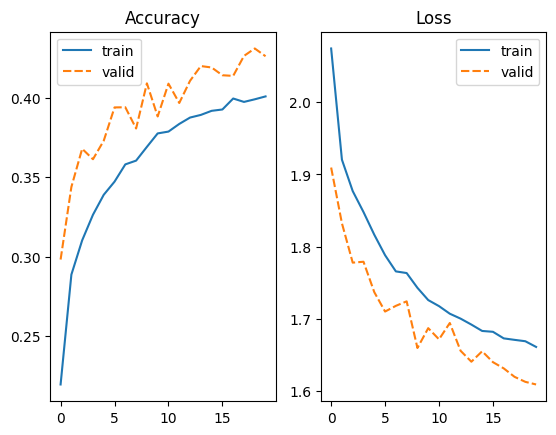

In [ ]:
import seaborn as sns
import pandas as pd
acc_df = pd.DataFrame()
loss_df = pd.DataFrame()
acc_df['train'] = his_mlp.history['accuracy']
acc_df['valid'] = his_mlp.history['val_accuracy']
loss_df['train'] = his_mlp.history['loss']
loss_df['valid'] = his_mlp.history['val_loss']
fig, axs = plt.subplots(ncols=2)
sns.lineplot(acc_df,ax=axs[0]).set_title("Accuracy")
sns.lineplot(loss_df,ax=axs[1]).set_title("Loss")
model_mlp.evaluate(cf_test_x, cf_test_y, verbose=2)

In [ ]:
model_cnn = tf.keras.models.Sequential([
  tf.keras.Input(shape = (32,32,3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
print(model_cnn)
model_cnn.summary()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model_cnn.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
# his_cnn = model_cnn.fit(cf_train_x, cf_train_y, epochs = 20,
#                         validation_split=0.2, batch_size = 100)

<Sequential name=sequential_8, built=True>


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 30, 30, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 13, 13, 32)          │          36,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,162 (363.91 KB)

 Trainable params: 93,162 (363.91 KB)

 Non-trainable params: 0 (0.00 B)

313/313 - 2s - 6ms/step - accuracy: 0.6765 - loss: 0.9079


[0.9079464673995972, 0.6765000224113464]

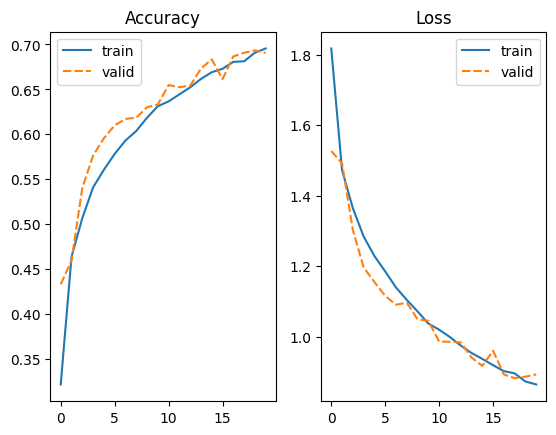

In [ ]:
import seaborn as sns
import pandas as pd
acc_df = pd.DataFrame()
loss_df = pd.DataFrame()
acc_df['train'] = his_cnn.history['accuracy']
acc_df['valid'] = his_cnn.history['val_accuracy']
loss_df['train'] = his_cnn.history['loss']
loss_df['valid'] = his_cnn.history['val_loss']
fig, axs = plt.subplots(ncols=2)
sns.lineplot(acc_df,ax=axs[0]).set_title("Accuracy")
sns.lineplot(loss_df,ax=axs[1]).set_title("Loss")
model_cnn.evaluate(cf_test_x, cf_test_y, verbose=2)

In [ ]:
from sklearn.model_selection import train_test_split
# time_x = np.load('images.npy')
# time_y = np.load('labels.npy')
time_x = np.load('s_images.npy')
time_y = np.load('s_labels.npy')
train_tx, test_tx, train_ty, test_ty = train_test_split(time_x, time_y, test_size=0.1, random_state=42)
# train_tx = train_tx/255
# test_tx = test_tx/255

In [ ]:
train_tx[:,1]
train_ty[:,0]



array([11,  6,  9, ...,  3,  0, 10])

In [ ]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau

# # Define the learning rate scheduler
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)

# # Compile the model
# model_time.compile(optimizer='adam', loss={'hr_y': loss_fn, 'min_y': 'mse'},
#                    metrics={'hr_y': 'accuracy', 'min_y': 'mae'})

# # Train the model with the learning rate scheduler
# his_model_time = model_time.fit(train_tx, {'hr_y': train_ty[:,0], 'min_y': train_ty[:,1]},
#                                 epochs=30, validation_split=0.1, batch_size=100,
#                                 callbacks=[early_stopping, reduce_lr])

# resize_and_rescale = tf.keras.Sequential([
#   layers.Resizing(IMG_SIZE, IMG_SIZE),
#   layers.Rescaling(1./255)
# ])
  # layers.RandomFlip("horizontal_and_vertical"),
  # layers.RandomRotation(0.2),

In [ ]:
# input_layer = tf.keras.Input(shape=(150,150,1))
input_layer = tf.keras.Input(shape=(75,75,1))

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(input_layer)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
# x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Flatten()(x)

hr_y = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
hr_y = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(hr_y)
hr_y = tf.keras.layers.Dropout(0.2)(hr_y)
hr_y = tf.keras.layers.Dense(12,name='hr_y')(hr_y)

min_y = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
min_y = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(min_y)
min_y = tf.keras.layers.Dropout(0.2)(min_y)
min_y =  tf.keras.layers.Dense(1,name='min_y')(min_y)

model_time = tf.keras.Model(inputs=input_layer, outputs=[hr_y, min_y])
model_time.summary()
print(model_time)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)


model_time.compile(optimizer=optimizer,
                   loss={'hr_y': loss_fn, 'min_y': 'mse'},
                   metrics={'hr_y': 'accuracy', 'min_y': 'mae'})


his_model_time = model_time.fit(train_tx, {'hr_y': train_ty[:,0], 'min_y': train_ty[:,1]},
                                epochs = 50, validation_split=0.1, batch_size = 100,
                                callbacks = [early_stopping])

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 75, 75, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 73, 73, 128)    │          1,280 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 73, 73, 128)    │            512 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 71, 71, 64)     │         73,792 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 35, 35, 64)     │              0 │ conv2d_6[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 78400)          │              0 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 256)            │     20,070,656 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 256)            │     20,070,656 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 128)            │         32,896 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 128)            │         32,896 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 128)            │              0 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 128)            │              0 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hr_y (Dense)              │ (None, 12)             │          1,548 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ min_y (Dense)             │ (None, 1)              │            129 │ dropout_6[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 40,284,365 (153.67 MB)

 Trainable params: 40,284,109 (153.67 MB)

 Non-trainable params: 256 (1.00 KB)

<Functional name=functional_2, built=True>
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 36s 170ms/step - hr_y_accuracy: 0.0885 - loss: 576.8549 - min_y_mae: 18.5600 - val_hr_y_accuracy: 0.0840 - val_loss: 1148.3212 - val_min_y_mae: 29.0299
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - hr_y_accuracy: 0.0828 - loss: 307.9774 - min_y_mae: 14.5239 - val_hr_y_accuracy: 0.0932 - val_loss: 1067.8324 - val_min_y_mae: 27.7730
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - hr_y_accuracy: 0.0969 - loss: 283.4203 - min_y_mae: 13.5192 - val_hr_y_accuracy: 0.1136 - val_loss: 873.4013 - val_min_y_mae: 24.6371
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - hr_y_accuracy: 0.1204 - loss: 262.4673 - min_y_mae: 12.7637 - val_hr_y_accuracy: 0.1636 - val_loss: 453.4724 - val_min_y_mae: 17.1642
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - hr_y_accuracy: 0.1506 - loss: 237.7106 - min_y_mae: 11.9144 - val_hr_y_accuracy: 0.1537 - val_loss: 297.2541 - val_min_y_mae: 13.5674
Epoc

In [ ]:
# input_layer = tf.keras.Input(shape=(150,150,1))
K.clear_session()
input_layer = tf.keras.Input(shape=(75,75,1))
x = tf.keras.layers.Rescaling(1./255)(input_layer)
# x = tf.keras.layers.RandomFlip("horizontal_and_vertical")(x)
# x = tf.keras.layers.RandomRotation(0.2)(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(128, activation='relu')(x)

# hr_y = tf.keras.layers.Conv2D(256, (3, 3), activation='relu')(x)
# hr_y = tf.keras.layers.Flatten()(hr_y)
hr_y = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
hr_y = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(hr_y)
hr_y = tf.keras.layers.Dropout(0.2)(hr_y)
hr_y = tf.keras.layers.Dense(12,name='hr_y')(hr_y)

# min_y = tf.keras.layers.Conv2D(256, (3, 3), activation='relu')(x)
# min_y = tf.keras.layers.Flatten()(min_y)
min_y = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
min_y = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(min_y)
min_y = tf.keras.layers.Dropout(0.2)(min_y)
min_y = tf.keras.layers.Dense(1,name='min_y')(min_y)

model_time = tf.keras.Model(inputs=input_layer, outputs=[hr_y, min_y])
model_time.summary()
print(model_time)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=2, min_lr=1e-6, verbose=1)

model_time.compile(optimizer=optimizer,
                   loss={'hr_y': loss_fn, 'min_y': 'mse'},
                   metrics={'hr_y': 'accuracy', 'min_y': 'mae'})


his_model_time = model_time.fit(train_tx, {'hr_y': train_ty[:,0], 'min_y': train_ty[:,1]/59},
                                epochs = 30, validation_split=0.1, batch_size = 100,
                                callbacks = [early_stopping, reduce_lr])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 75, 75, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 75, 75, 1)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 73, 73, 128)    │          1,280 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 73, 73, 128)    │            512 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 36, 36, 128)    │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 34, 34, 32)     │         36,896 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 34, 34, 32)     │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 17, 17, 32)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 15, 15, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 15, 15, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 7, 7, 64)       │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 7, 7, 64)       │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 3136)           │              0 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │        401,536 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │        401,536 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)      

 Total params: 877,997 (3.35 MB)

 Trainable params: 877,549 (3.35 MB)

 Non-trainable params: 448 (1.75 KB)

<Functional name=functional, built=True>
Epoch 1/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 25s 91ms/step - hr_y_accuracy: 0.0855 - loss: 9.2035 - min_y_mae: 0.5873 - val_hr_y_accuracy: 0.0858 - val_loss: 6.4239 - val_min_y_mae: 0.6202 - learning_rate: 5.0000e-04
Epoch 2/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - hr_y_accuracy: 0.0837 - loss: 5.6461 - min_y_mae: 0.2684 - val_hr_y_accuracy: 0.0907 - val_loss: 5.0092 - val_min_y_mae: 0.5338 - learning_rate: 5.0000e-04
Epoch 3/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - hr_y_accuracy: 0.0840 - loss: 4.5456 - min_y_mae: 0.2603 - val_hr_y_accuracy: 0.1019 - val_loss: 4.2734 - val_min_y_mae: 0.4412 - learning_rate: 5.0000e-04
Epoch 4/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - hr_y_accuracy: 0.1184 - loss: 3.9549 - min_y_mae: 0.2420 - val_hr_y_accuracy: 0.1426 - val_loss: 3.6992 - val_min_y_mae: 0.3048 - learning_rate: 5.0000e-04
Epoch 5/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - hr_y_accuracy: 0.1521 - loss: 3.4930 - min_y_mae: 0.2278 -

In [ ]:
print(his_model_time.history.keys())

dict_keys(['hr_y_accuracy', 'loss', 'min_y_mae', 'val_hr_y_accuracy', 'val_loss', 'val_min_y_mae'])


57/57 - 2s - 40ms/step - hr_y_accuracy: 0.9133 - loss: 0.5601 - min_y_mae: 0.1198


[0.560133159160614, 0.9133333563804626, 0.11982472240924835]

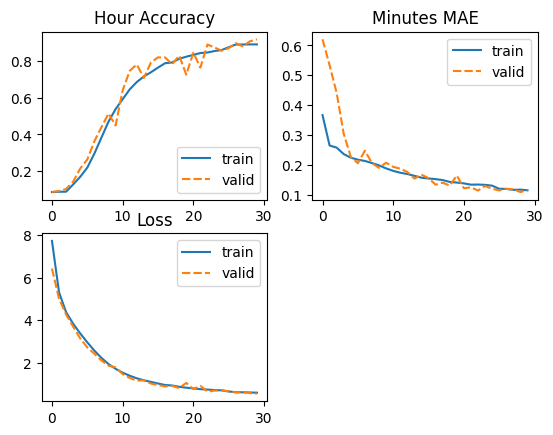

In [ ]:
import seaborn as sns
import pandas as pd
hr_acc_df = pd.DataFrame()
loss_df = pd.DataFrame()
min_mae_df = pd.DataFrame()
hr_acc_df['train'] = his_model_time.history['hr_y_accuracy']
hr_acc_df['valid'] = his_model_time.history['val_hr_y_accuracy']
min_mae_df['train'] = his_model_time.history['min_y_mae']
min_mae_df['valid'] = his_model_time.history['val_min_y_mae']
loss_df['train'] = his_model_time.history['loss']
loss_df['valid'] = his_model_time.history['val_loss']
fig, axs = plt.subplots(ncols=2,nrows=2)
sns.lineplot(hr_acc_df,ax=axs[0,0]).set_title("Hour Accuracy")
sns.lineplot(min_mae_df,ax=axs[0,1]).set_title("Minutes MAE")
sns.lineplot(loss_df,ax=axs[1,0]).set_title("Loss")
axs[1, 1].axis('off')
model_time.evaluate(test_tx,  {'hr_y': test_ty[:, 0], 'min_y': test_ty[:, 1] / 59}, verbose=2)

In [ ]:
print(test_ty[0:10])
pred_hr_1,pred_min_1 = model_time.predict(test_tx[0:10,:])
pred_hr = np.argmax(tf.nn.softmax(pred_hr_1),axis=1)
pred_min = pred_min_1*60
pred_hr,pred_min

[[ 1 42]
 [ 4 59]
 [ 6  8]
 [ 3 38]
 [ 0 29]
 [ 7 50]
 [ 0 34]
 [ 4 50]
 [ 7 39]
 [ 7 44]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


(array([1, 4, 6, 3, 0, 7, 0, 4, 7, 7]),
 array([[43.076347],
        [33.971767],
        [ 9.685778],
        [37.67369 ],
        [26.749514],
        [48.3275  ],
        [29.862438],
        [50.132347],
        [39.0809  ],
        [40.210472]], dtype=float32))

In [ ]:
  model_time_1 = tf.keras.models.Sequential([
  # tf.keras.Input(shape = (150,150,1)),
  tf.keras.Input(shape = (75,75,1)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(12)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model_time_1.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
model_time_1.summary()
print(model_time_1)

his_model_time_1 = model_time_1.fit(train_tx, train_ty[:,0],
                                    epochs = 30, validation_split=0.1, batch_size = 100,
                                    callbacks = [early_stopping])

NameError: name 'tf' is not defined

57/57 - 1s - 25ms/step - accuracy: 0.6822 - loss: 1.1090


[1.108975887298584, 0.6822222471237183]

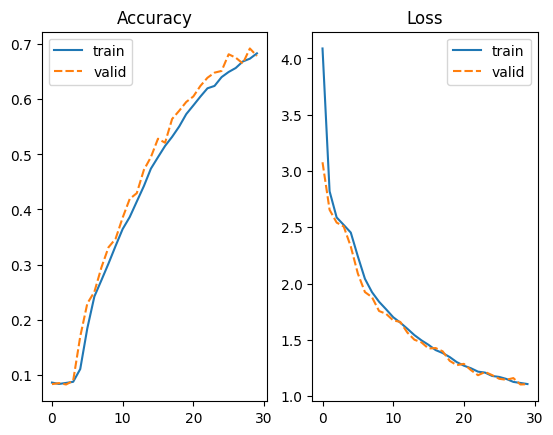

In [ ]:
import seaborn as sns
import pandas as pd
acc_df = pd.DataFrame()
loss_df = pd.DataFrame()
acc_df['train'] = his_model_time_1.history['accuracy']
acc_df['valid'] = his_model_time_1.history['val_accuracy']
loss_df['train'] = his_model_time_1.history['loss']
loss_df['valid'] = his_model_time_1.history['val_loss']
fig, axs = plt.subplots(ncols=2)
sns.lineplot(acc_df,ax=axs[0]).set_title("Accuracy")
sns.lineplot(loss_df,ax=axs[1]).set_title("Loss")
model_time_1.evaluate(test_tx,  test_ty[:,0], verbose=2)


In [ ]:
model_time_2 = tf.keras.models.Sequential([
  # tf.keras.Input(shape = (150,150,1)),
  tf.keras.Input(shape = (75,75,1)),
  tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation = 'linear')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model_time_2.compile(optimizer=optimizer, loss='mse',metrics=['mae'])
model_time_2.summary()
print(model_time_2)

his_model_time_2 = model_time_2.fit(train_tx, train_ty[:,1],
                                    epochs = 30, validation_split=0.1, batch_size = 100,
                                    callbacks = [early_stopping])

# Training data would be formatted as: y_train = [[hour, minute], ...]


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 73, 73, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 71, 71, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 78400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │      20,070,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,179,265 (76.98 MB)

 Trainable params: 20,179,009 (76.98 MB)

 Non-trainable params: 256 (1.00 KB)

<Sequential name=sequential_7, built=True>
Epoch 1/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - loss: 182.1786 - mae: 4.7775 - val_loss: 6.1791 - val_mae: 0.4916
Epoch 2/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - loss: 5.5903 - mae: 0.2612 - val_loss: 4.9989 - val_mae: 0.4688
Epoch 3/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - loss: 4.6046 - mae: 0.2603 - val_loss: 4.2445 - val_mae: 0.3948
Epoch 4/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - loss: 3.9710 - mae: 0.2559 - val_loss: 3.6592 - val_mae: 0.3186
Epoch 5/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - loss: 3.4892 - mae: 0.2553 - val_loss: 3.1846 - val_mae: 0.2503
Epoch 6/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - loss: 3.1017 - mae: 0.2559 - val_loss: 2.8482 - val_mae: 0.2470
Epoch 7/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - loss: 2.7841 - mae: 0.2600 - val_loss: 2.5718 - val_mae: 0.2494
Epoch 8/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - loss: 2.5139 - mae: 0.2548 - val_loss: 2.3317 - val_mae: 0

In [ ]:
print(his_model_time_2.history.keys())

Text(0.5, 1.0, 'Loss')

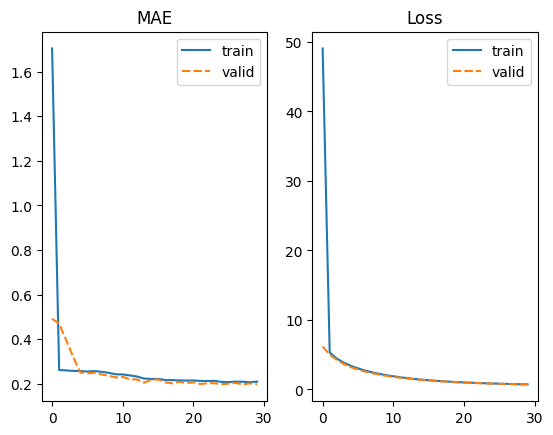

In [ ]:
import seaborn as sns
import pandas as pd
mae_df = pd.DataFrame()
loss_df = pd.DataFrame()
mae_df['train'] = his_model_time_2.history['mae']
mae_df['valid'] = his_model_time_2.history['val_mae']
loss_df['train'] = his_model_time_2.history['loss']
loss_df['valid'] = his_model_time_2.history['val_loss']
fig, axs = plt.subplots(ncols=2)
sns.lineplot(mae_df,ax=axs[0]).set_title("MAE")
sns.lineplot(loss_df,ax=axs[1]).set_title("Loss")
model_time_2.evaluate(test_tx,  test_ty[:,1], verbose=2)


In [ ]:
train_ty_cont = np.round(train_ty[:,0]+train_ty[:,1]/60,5)
test_ty_cont = np.round(test_ty[:,0]+test_ty[:,1]/60,5)
train_ty_cont

array([11.46667,  6.56667,  9.96667, ...,  3.58333,  0.56667, 10.51667])

In [ ]:
model_time_3 = tf.keras.models.Sequential([
  # tf.keras.Input(shape = (150,150,1)),
  tf.keras.Input(shape = (75,75,1)),
  tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation = 'linear')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_time_3.compile(optimizer=optimizer, loss='mse',metrics=['mae'])
model_time_3.summary()
print(model_time_3)

his_model_time_3 = model_time_3.fit(train_tx, train_ty_cont,
                                epochs = 30, validation_split=0.1, batch_size = 100)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 73, 73, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 71, 71, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 78400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 256)                 │      20,070,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,179,265 (76.98 MB)

 Trainable params: 20,179,009 (76.98 MB)

 Non-trainable params: 256 (1.00 KB)

<Sequential name=sequential_8, built=True>
Epoch 1/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - loss: 346.5074 - mae: 8.0863 - val_loss: 55.3489 - val_mae: 5.9334
Epoch 2/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - loss: 20.3014 - mae: 3.0326 - val_loss: 52.1303 - val_mae: 5.8022
Epoch 3/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - loss: 18.4588 - mae: 2.9696 - val_loss: 41.8555 - val_mae: 5.0313
Epoch 4/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - loss: 16.9077 - mae: 2.8489 - val_loss: 28.2414 - val_mae: 3.9333
Epoch 5/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - loss: 15.6968 - mae: 2.6879 - val_loss: 18.2762 - val_mae: 2.9816
Epoch 6/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - loss: 14.1109 - mae: 2.4809 - val_loss: 13.9367 - val_mae: 2.4547
Epoch 7/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 13.1842 - mae: 2.3812 - val_loss: 12.6773 - val_mae: 2.2938
Epoch 8/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 12.1649 - mae: 2.2515 - val_loss: 11.06

Text(0.5, 1.0, 'Loss')

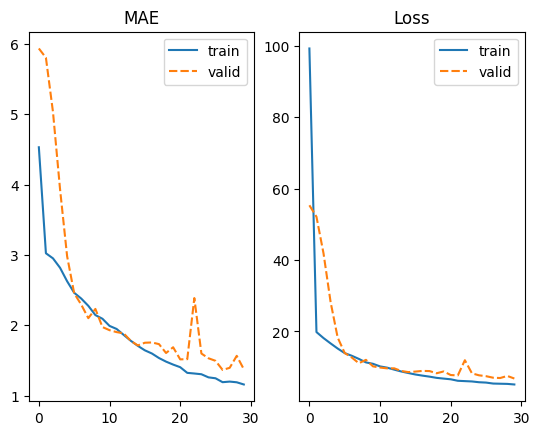

In [ ]:
import seaborn as sns
import pandas as pd
mae_df = pd.DataFrame()
loss_df = pd.DataFrame()
mae_df['train'] = his_model_time_3.history['mae']
mae_df['valid'] = his_model_time_3.history['val_mae']
loss_df['train'] = his_model_time_3.history['loss']
loss_df['valid'] = his_model_time_3.history['val_loss']
fig, axs = plt.subplots(ncols=2)
sns.lineplot(mae_df,ax=axs[0]).set_title("MAE")
sns.lineplot(loss_df,ax=axs[1]).set_title("Loss")
model_time_3.evaluate(test_tx,  test_ty_cont, verbose=2)

In [ ]:
model_time_4 = tf.keras.models.Sequential([
  # tf.keras.Input(shape = (150,150,1)),
  tf.keras.Input(shape = (75,75,1)),
  tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation = 'linear')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_time_4.compile(optimizer=optimizer, loss='mse',metrics=['mae'])
model_time_4.summary()
print(model_time_4)
train_ty_1 = train_ty.copy().astype(np.float32)
train_ty_1[:,0] = train_ty_1[:,0]/11
train_ty_1[:,1] = train_ty_1[:,1]/59
his_model_time_4 = model_time_4.fit(train_tx, train_ty_1,
                                epochs = 30, validation_split=0.1, batch_size = 100)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)                   │ (None, 73, 73, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 34, 34, 32)          │          36,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 467,106 (1.78 MB)

 Trainable params: 466,850 (1.78 MB)

 Non-trainable params: 256 (1.00 KB)

<Sequential name=sequential_18, built=True>
Epoch 1/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - loss: 2.8730 - mae: 0.3347 - val_loss: 1.0120 - val_mae: 0.4060
Epoch 2/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 0.6876 - mae: 0.2706 - val_loss: 0.4509 - val_mae: 0.3629
Epoch 3/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3002 - mae: 0.2648 - val_loss: 0.2410 - val_mae: 0.3039
Epoch 4/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1805 - mae: 0.2614 - val_loss: 0.1538 - val_mae: 0.2704
Epoch 5/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1336 - mae: 0.2569 - val_loss: 0.1132 - val_mae: 0.2517
Epoch 6/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.1134 - mae: 0.2546 - val_loss: 0.1058 - val_mae: 0.2520
Epoch 7/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1032 - mae: 0.2514 - val_loss: 0.0944 - val_mae: 0.2405
Epoch 8/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0970 - mae: 0.2442 - val_loss: 0.0903 - val_mae: 0.2338
E

57/57 - 2s - 28ms/step - loss: 588.8846 - mae: 17.0438


[588.8846435546875, 17.04380989074707]

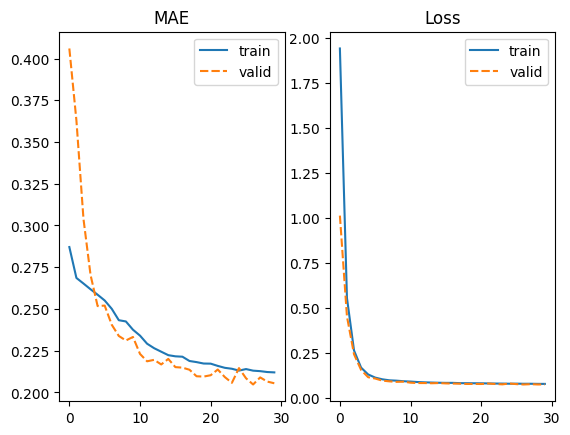

In [ ]:
import seaborn as sns
import pandas as pd
mae_df = pd.DataFrame()
loss_df = pd.DataFrame()
mae_df['train'] = his_model_time_4.history['mae']
mae_df['valid'] = his_model_time_4.history['val_mae']
loss_df['train'] = his_model_time_4.history['loss']
loss_df['valid'] = his_model_time_4.history['val_loss']
fig, axs = plt.subplots(ncols=2)
sns.lineplot(mae_df,ax=axs[0]).set_title("MAE")
sns.lineplot(loss_df,ax=axs[1]).set_title("Loss")
model_time_4.evaluate(test_tx,  test_ty, verbose=2)

In [ ]:
test_tx[1:10,:].shape

(9, 75, 75)

In [ ]:
test_tx[1,:].shape
print(test_ty[0:10])
pred_4 = model_time_4.predict(test_tx[0:10,:])
pred_4[:,0] = pred_4[:,0]*11
pred_4[:,1] = pred_4[:,1]*59
pred_4

[[ 1 42]
 [ 4 59]
 [ 6  8]
 [ 3 38]
 [ 0 29]
 [ 7 50]
 [ 0 34]
 [ 4 50]
 [ 7 39]
 [ 7 44]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[ 6.5749216, 34.299957 ],
       [ 5.2066774, 27.654911 ],
       [ 4.8994474, 26.787361 ],
       [ 4.4225345, 24.617626 ],
       [ 4.5384197, 24.80747  ],
       [ 7.6737895, 39.995598 ],
       [ 4.0860043, 22.644123 ],
       [ 7.8342094, 39.522305 ],
       [ 7.4607286, 39.078857 ],
       [ 8.3431   , 43.664215 ]], dtype=float32)

In [ ]:
train_ty_period = np.round([np.cos(train_ty[:,0]/12*2*np.pi),
                   np.sin(train_ty[:,0]/12*2*np.pi),
                   np.cos(train_ty[:,1]/60*2*np.pi),
                   np.sin(train_ty[:,1]/60*2*np.pi)],5)
train_ty_period = np.array(train_ty_period).T
print(train_ty[:10])
train_ty_period[:10]


[[11 28]
 [ 6 34]
 [ 9 58]
 [ 3  0]
 [ 9 27]
 [ 5 51]
 [ 1 47]
 [ 6 45]
 [ 6 24]
 [ 2 24]]


array([[ 0.86603, -0.5    , -0.97815,  0.20791],
       [-1.     ,  0.     , -0.91355, -0.40674],
       [-0.     , -1.     ,  0.97815, -0.20791],
       [ 0.     ,  1.     ,  1.     ,  0.     ],
       [-0.     , -1.     , -0.95106,  0.30902],
       [-0.86603,  0.5    ,  0.58779, -0.80902],
       [ 0.86603,  0.5    ,  0.20791, -0.97815],
       [-1.     ,  0.     , -0.     , -1.     ],
       [-1.     ,  0.     , -0.80902,  0.58779],
       [ 0.5    ,  0.86603, -0.80902,  0.58779]])

In [ ]:
train_ty_deg = train_ty[:,0]/12*2*np.pi+train_ty[:,1]/60*np.pi/6
print(train_ty_deg[:10])
train_ty_period_2 = np.array(np.round([np.cos(train_ty_deg),
                                       np.sin(train_ty_deg)],5)).T
train_ty_period_2[:10]

[6.00393263 3.43829863 5.21853446 1.57079633 4.94800843 3.06305284
 0.93375115 3.53429174 3.35103216 1.25663706]


array([[ 0.96126, -0.27564],
       [-0.9563 , -0.29237],
       [ 0.48481, -0.87462],
       [ 0.     ,  1.     ],
       [ 0.23345, -0.97237],
       [-0.99692,  0.07846],
       [ 0.59482,  0.80386],
       [-0.92388, -0.38268],
       [-0.97815, -0.20791],
       [ 0.30902,  0.95106]])

In [ ]:
model_time_5 = tf.keras.models.Sequential([
  # tf.keras.Input(shape = (150,150,1)),
  tf.keras.Input(shape = (75,75,1)),
  tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation = 'linear')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_time_5.compile(optimizer=optimizer, loss='mse',metrics=['mae'])
model_time_5.summary()
print(model_time_5)

his_model_time_5 = model_time_5.fit(train_tx, train_ty_period_2,
                                epochs = 30, validation_split=0.1, batch_size = 100)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 73, 73, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 34, 34, 32)          │          36,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 467,106 (1.78 MB)

 Trainable params: 466,850 (1.78 MB)

 Non-trainable params: 256 (1.00 KB)

<Sequential name=sequential_12, built=True>
Epoch 1/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - loss: 2.9696 - mae: 0.6590 - val_loss: 1.0096 - val_mae: 0.6326
Epoch 2/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.7751 - mae: 0.5186 - val_loss: 0.6706 - val_mae: 0.5987
Epoch 3/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.4527 - mae: 0.4147 - val_loss: 0.5059 - val_mae: 0.5304
Epoch 4/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.3412 - mae: 0.3599 - val_loss: 0.3640 - val_mae: 0.4260
Epoch 5/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.2897 - mae: 0.3252 - val_loss: 0.2551 - val_mae: 0.3061
Epoch 6/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.2541 - mae: 0.2952 - val_loss: 0.2127 - val_mae: 0.2413
Epoch 7/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.2279 - mae: 0.2675 - val_loss: 0.1883 - val_mae: 0.2210
Epoch 8/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.2079 - mae: 0.2513 - val_loss: 0.1744 - val_mae: 0.2024


57/57 - 1s - 24ms/step - loss: 609.7620 - mae: 17.6323


[609.7620239257812, 17.632347106933594]

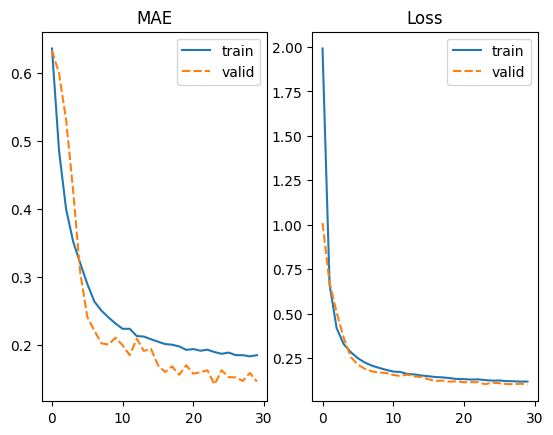

In [ ]:
import seaborn as sns
import pandas as pd
mae_df = pd.DataFrame()
loss_df = pd.DataFrame()
mae_df['train'] = his_model_time_5.history['mae']
mae_df['valid'] = his_model_time_5.history['val_mae']
loss_df['train'] = his_model_time_5.history['loss']
loss_df['valid'] = his_model_time_5.history['val_loss']
fig, axs = plt.subplots(ncols=2)
sns.lineplot(mae_df,ax=axs[0]).set_title("MAE")
sns.lineplot(loss_df,ax=axs[1]).set_title("Loss")
model_time_5.evaluate(test_tx,  test_ty, verbose=2)

In [ ]:
print(test_ty[0:10])
# print(train_ty[0:10])
y_pred_p2 = model_time_5.predict(test_tx[0:10,:])
# y_pred_p2 = train_ty_period_2.copy()
y_pred_rad = np.arctan2(y_pred_p2[:,1],y_pred_p2[:,0])
y_pred_rad = (y_pred_rad < 0)*2*np.pi+y_pred_rad
y_pred_clk = y_pred_rad/2/np.pi*12
np.array([y_pred_clk.astype(int),np.round(y_pred_clk%1*60)]).T


[[ 1 42]
 [ 4 59]
 [ 6  8]
 [ 3 38]
 [ 0 29]
 [ 7 50]
 [ 0 34]
 [ 4 50]
 [ 7 39]
 [ 7 44]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[ 1., 58.],
       [ 5., 12.],
       [ 6.,  0.],
       [ 3., 34.],
       [ 0., 35.],
       [ 8.,  0.],
       [ 0., 31.],
       [ 5., 12.],
       [ 7., 44.],
       [ 7., 56.]])